# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import statsmodels.api as sm
import sklearn

In [11]:
x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
print(student_data)

                                          X                                Y
0  [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]  [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]


Draw a dispersion diagram (scatter plot) for the data.

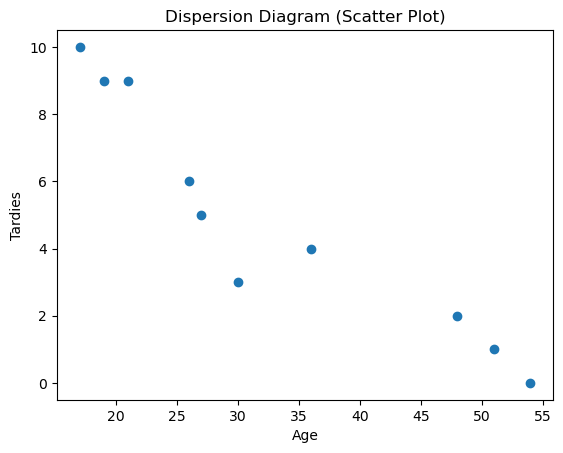

In [13]:
student_data = pd.DataFrame({'X': x_values, 'Y': y_values})


plt.scatter(student_data['X'], student_data['Y'])
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Dispersion Diagram (Scatter Plot)')


plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
#yes i see, based on this trend, we can make a hypothesis that there is a strong negative correlation between age and the number of tardies


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [14]:
    #As expected, it is very close to -1, indicating a strong negative correlation between age and tardies. This value reinforces our previous observations that younger students are more often late to class.
#correlation:
correlation = student_data['X'].corr(student_data['Y'])
print("Correlation:", correlation)
#covariance:
covariance = student_data['X'].cov(student_data['Y'])
print("Covariance:", covariance)

Correlation: -0.9391626886887122
Covariance: -45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [22]:
# The linear regression model with the outcome variable "Tardies" and the input feature "Age" help me understand and predict how tardiness changes as students' ages increase.
student_data = pd.DataFrame({'Age': x_values, 'Tardies': y_values})

X = student_data[['Age']]
y = student_data['Tardies']


regression_model = LinearRegression()
regression_model.fit(X, y)


slope = regression_model.coef_[0]
intercept = regression_model.intercept_


print("Slope (Coefficient):", slope)
print("Intercept:", intercept)

Slope (Coefficient): -0.2428207709159809
Intercept: 12.888803363135771


Plot your regression model on your scatter plot.

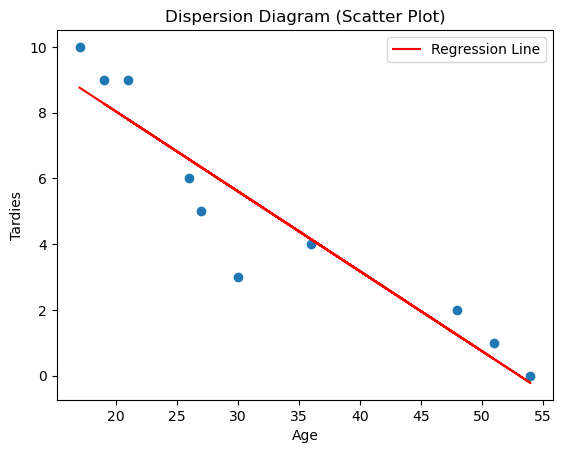

In [23]:
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Dispersion Diagram (Scatter Plot)')
plt.plot(student_data['Age'], slope * student_data['Age'] + intercept, color='red', label='Regression Line')
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# the model indicates a negative relationship between age and tardiness, suggesting that older students tend to be less tardy


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [24]:
data_path = "vehicles.csv"  
vehicles_data = pd.read_csv(data_path)

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [26]:
# I conclude that 'Fuel Barrels/Year' is the most important variable in determining CO2 emissions, while 'Year' provides the least helpful information among the selected independent variables 
selected_variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
selected_data = vehicles_data[selected_variables]
correlations = selected_data.corr()
print(correlations)

                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile       

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [27]:
#  the type of regression used is still multiple linear regression, and it is performing well in predicting CO2 emissions based on the selected independent variables.
selected_variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
selected_data = vehicles_data[selected_variables]

X = selected_data.drop(columns=['CO2 Emission Grams/Mile'])
y = selected_data['CO2 Emission Grams/Mile']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


y_pred = regression_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 289.8277440813765
R-squared: 0.9794542628636335


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [30]:
# Fuel Cost/Year' also has a positive coefficient, suggesting that higher annual fuel costs are associated with higher CO2 emissions.
X = sm.add_constant(X)

regression_model = sm.OLS(y, X)
results = regression_model.fit()

print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                             18:49:50   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [31]:
x_values = [1, 3, 4, 6, 8, 9, 11, 14]
y_values = [1, 2, 4, 4, 5, 7, 8, 13]


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

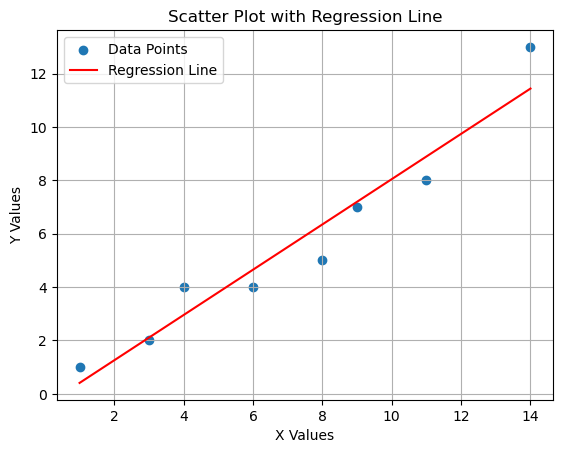

In [32]:
coefficients = np.polyfit(x_values, y_values, 1)
regression_line = np.poly1d(coefficients)


x_regression = np.linspace(min(x_values), max(x_values), 100)
y_regression = regression_line(x_regression)


plt.scatter(x_values, y_values, label='Data Points')
plt.plot(x_regression, y_regression, color='red', label='Regression Line')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.grid(True)
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [33]:
# Have a positive correlation
coefficients = np.polyfit(x_values, y_values, 1)
regression_line = np.poly1d(coefficients)
print("Regression Coefficients:")
print("Slope (m):", coefficients[0])
print("Intercept (b):", coefficients[1])
print("Regression Equation: y =", regression_line)

Regression Coefficients:
Slope (m): 0.8484848484848484
Intercept (b): -0.43939393939393534
Regression Equation: y =  
0.8485 x - 0.4394


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

New Regression Coefficients:
Slope (m): 0.8484848484848484
Intercept (b): -0.43939393939393534
Regression Equation: y =  
0.8485 x - 0.4394


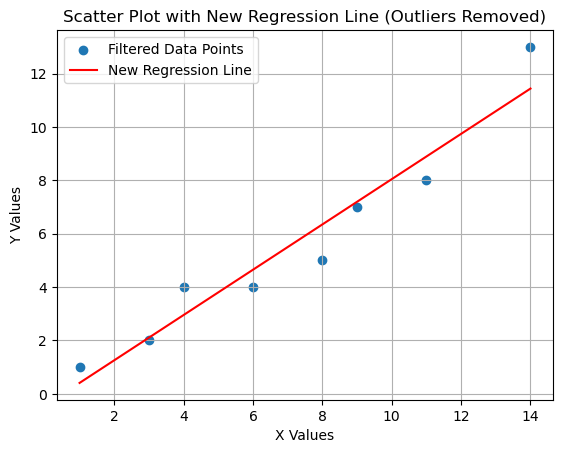

In [34]:
# Your response here. 
coefficients_original = np.polyfit(x_values, y_values, 1)
regression_line_original = np.poly1d(coefficients_original)
residuals = np.array(y_values) - regression_line_original(np.array(x_values))
outlier_threshold = 3 * np.std(residuals)
outliers_mask = abs(residuals) > outlier_threshold


x_values_filtered = np.array(x_values)[~outliers_mask]
y_values_filtered = np.array(y_values)[~outliers_mask]


coefficients_filtered = np.polyfit(x_values_filtered, y_values_filtered, 1)
regression_line_filtered = np.poly1d(coefficients_filtered)


print("New Regression Coefficients:")
print("Slope (m):", coefficients_filtered[0])
print("Intercept (b):", coefficients_filtered[1])
print("Regression Equation: y =", regression_line_filtered)


x_regression_filtered = np.linspace(min(x_values_filtered), max(x_values_filtered), 100)
y_regression_filtered = regression_line_filtered(x_regression_filtered)


plt.scatter(x_values_filtered, y_values_filtered, label='Filtered Data Points')
plt.plot(x_regression_filtered, y_regression_filtered, color='red', label='New Regression Line')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot with New Regression Line (Outliers Removed)')
plt.legend()
plt.grid(True)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
